### Import packages

In [3]:
import torch
from dagma import utils
from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear
# Import pandas
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import math

In [4]:
# reading csv file
df = pd.read_csv("../data/asia.csv")
print(df.head())

df = df.replace({'yes': 1, 'no': 0})
# Remove column name 'A'
df=df.drop(columns=df.columns[0],axis=1)

   Unnamed: 0   A    S    T   L    B    E    X    D
0           1  no  yes   no  no  yes   no   no  yes
1           2  no  yes   no  no   no   no   no   no
2           3  no   no  yes  no   no  yes  yes  yes
3           4  no   no   no  no  yes   no   no  yes
4           5  no   no   no  no   no   no   no  yes


### Generate data

In [11]:


# print(df.head())
dOld = df.copy()
dLogit = df.copy()
# get columns
nr = len(df)
print(nr)
# transform to the logit form
for col in  df.columns:
    var = df[col].copy()
    freq = var.value_counts().to_dict()
    # print(freq)
    # compute logit
    for key in freq.keys():
        # print(key)
        prob = freq[key] / float(nr)
        logitval = math.log(prob/(1.0-prob))
        # print(logitval)
        var = var.replace(to_replace=key,value=logitval)
        # print(var)
    # print(freq)
    # replace column values to freq
    dLogit[col] = var

print(dLogit.head())
print(df.head())
arrLogit = dLogit.to_numpy()
print(arrLogit)
dLogit.to_csv('../data/asiaLogit.csv')


5000
          A      S         T         L         B         E       X         D
0  4.771088  0.012  4.724165  2.649822  0.039205  2.526809  2.0525 -0.120144
1  4.771088  0.012  4.724165  2.649822 -0.039205  2.526809  2.0525  0.120144
2  4.771088 -0.012 -4.724165  2.649822 -0.039205 -2.526809 -2.0525 -0.120144
3  4.771088 -0.012  4.724165  2.649822  0.039205  2.526809  2.0525 -0.120144
4  4.771088 -0.012  4.724165  2.649822 -0.039205  2.526809  2.0525 -0.120144
   A  S  T  L  B  E  X  D
0  0  1  0  0  1  0  0  1
1  0  1  0  0  0  0  0  0
2  0  0  1  0  0  1  1  1
3  0  0  0  0  1  0  0  1
4  0  0  0  0  0  0  0  1
[[ 4.77108809  0.01200014  4.72416461 ...  2.52680914  2.05250014
  -0.12014431]
 [ 4.77108809  0.01200014  4.72416461 ...  2.52680914  2.05250014
   0.12014431]
 [ 4.77108809 -0.01200014 -4.72416461 ... -2.52680914 -2.05250014
  -0.12014431]
 ...
 [ 4.77108809 -0.01200014  4.72416461 ...  2.52680914  2.05250014
   0.12014431]
 [ 4.77108809  0.01200014  4.72416461 ...  2.526

In [6]:
# convert to nparray
arr = df.to_numpy()
arrFloat = arr.astype('float')
print(arr)

[[ 4.77108809  0.01200014  4.72416461 ...  2.52680914  2.05250014
  -0.12014431]
 [ 4.77108809  0.01200014  4.72416461 ...  2.52680914  2.05250014
   0.12014431]
 [ 4.77108809 -0.01200014 -4.72416461 ... -2.52680914 -2.05250014
  -0.12014431]
 ...
 [ 4.77108809 -0.01200014  4.72416461 ...  2.52680914  2.05250014
   0.12014431]
 [ 4.77108809  0.01200014  4.72416461 ...  2.52680914  2.05250014
  -0.12014431]
 [ 4.77108809  0.01200014  4.72416461 ...  2.52680914  2.05250014
  -0.12014431]]


In [45]:
# treating as categorical data
model = DagmaLinear(loss_type='logistic') # create a linear model with least squares loss
W_est = model.fit(arr,lambda1=0.005) # fit the model with L1 reg. (coeff. 0.02)

  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [7]:
# treating as continuous data
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(arrFloat,lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)


: 

In [ ]:
# treating as logit continous data
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(arrLogit,lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)


: 

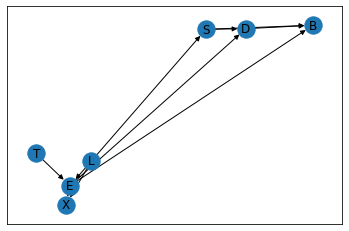

In [46]:
# print(W_est)
graph = nx.DiGraph()
# iterating the columns
nodeNames = df.columns.to_numpy()
# print(nodeNames)
# for col in df.columns:
#     print(col)
rows = int(W_est.size/nodeNames.size)
# print(rows)
for r in range(rows):
    row = W_est[r]
    # print(r)
    for c in range(row.size):
        val = W_est[r,c]
        if val != 0.0:
            # print(val)
            graph.add_edge(nodeNames[r],nodeNames[c],weight = val)


plt.tight_layout()
nx.draw_networkx(graph, arrows=True)

In [3]:
utils.set_random_seed(1)
# Create an Erdos-Renyi DAG of 20 nodes and 20 edges in expectation with Gaussian noise
# number of samples n = 500
n, d, s0 = 500, 20, 20 
graph_type, sem_type = 'ER', 'gauss'

B_true = utils.simulate_dag(d, s0, graph_type)
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, n, sem_type)



C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Test Linear Model

In [8]:
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(X, lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)
acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
print(acc)

  0%|          | 0/180000.0 [00:00<?, ?it/s]

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20}


### Test Nonlinear Model

In [9]:
# note: using torch.double instead of torch.float gives better result for larger num of nodes
eq_model = DagmaMLP(dims=[d, 10, 1], bias=True, dtype=torch.double) # create the model for the structural equations, in this case MLPs
model = DagmaNonlinear(eq_model, dtype=torch.double) # create the model for DAG learning
W_est = model.fit(X, lambda1=0.02, lambda2=0.005) # fit the model with L1 reg. (coeff. 0.02) and L2 reg. (coeff. 0.005)
acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
print(acc)

  0%|          | 0/230000.0 [00:00<?, ?it/s]

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20}
